In [11]:
from src import TARS, markets, portfolios, traders, strategies
import pandas as pd
%matplotlib inline

# Workbench

This is your place to try things and build new strategies. Be foolish!

## Instanciate Tars

In [2]:
root = '../'
api_key = f'{root}kraken.key'

In [3]:
# Create Tars and its associated objects
tars = TARS()

portfolio_1 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_1 = traders.VirtualCryptoTrader(portfolio_1)

portfolio_2 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_2 = traders.VirtualCryptoTrader(portfolio_2)

In [4]:
# Load strategies
strategy_1 = strategies.BuyAndHold(trader_1, 'XETHZUSD', 0.2)
strategy_2 = strategies.SequentialInvestment(trader_2, 'XETHZUSD', 0.2, 6, "00:01:00")

tars.load(strategy_1)
tars.load(strategy_2)

## Start the bot

In [5]:
# Start the bot with a loop frequency ten second
tars.start('00:00:10')
tars.is_running

True

## Evaluate the strategy

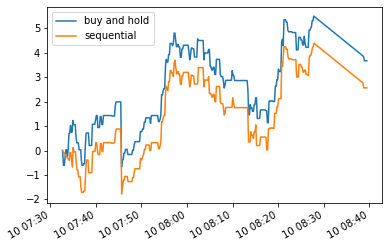

In [12]:
#col = 'value'
col = 'total net profit'
#col = 'profit factor'
#col = 'average trade net profit'


s1 = strategy_1.evaluator.evaluate()[col]
s1.name = 'buy and hold'

s2 = strategy_2.evaluator.evaluate()[col]
s2.name = 'sequential'

s1.plot(legend=True)
s2.plot(legend=True);

In [9]:
strategy_2.evaluator.evaluate()

,value,total net profit,profit factor,average trade net profit
2021-08-10 07:32:39.545386+00:00,1000.000,0.000,1.000000,0.000000
2021-08-10 07:34:07.625810+00:00,999.590,-0.410,0.999590,-0.068333
2021-08-10 07:34:17.883032+00:00,999.918,-0.082,0.999918,-0.013667
2021-08-10 07:34:28.760074+00:00,999.920,-0.080,0.999920,-0.013333
2021-08-10 07:34:39.016248+00:00,999.640,-0.360,0.999640,-0.060000
2021-08-10 07:34:49.268243+00:00,999.320,-0.680,0.999320,-0.113333
2021-08-10 07:34:59.523618+00:00,1000.118,0.118,1.000118,0.019667
2021-08-10 07:35:09.775762+00:00,999.946,-0.054,0.999946,-0.009000
2021-08-10 07:35:20.028211+00:00,999.946,-0.054,0.999946,-0.009000
2021-08-10 07:35:30.287565+00:00,999.946,-0.054,0.999946,-0.009000


## Stop the bot

In [28]:
tars.stop()
tars.is_running

False

---